In [1]:
import eegdash
import braindecode
from pathlib import Path
import os

from braindecode.datasets import BaseConcatDataset
from braindecode.preprocessing import preprocess, Preprocessor, create_windows_from_events
from braindecode.models import EEGNeX
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from eegdash.hbn.windows import (
    annotate_trials_with_target,
    add_aux_anchors,
    add_extras_columns,
    keep_only_recordings_with,
)

In [3]:
DATA_ROOT = Path("LOL_DATASET/HBN_DATA_FULL")
DATA_ROOT.mkdir(parents=True, exist_ok=True)

CACHE_DIR = DATA_ROOT / "R1_mini_L100_bdf"

In [4]:
print(CACHE_DIR)

LOL_DATASET/HBN_DATA_FULL/R1_mini_L100_bdf


In [5]:
from eegdash.dataset import EEGChallengeDataset
dataset = EEGChallengeDataset(
    cache_dir = str(CACHE_DIR),
    mini = True,
    task = "contrastChangeDetection",
    download = False,
    release = "R1",
    n_jobs = -1
)

╭─────────────────────────────────────── EEG 2025 Competition Data Notice ────────────────────────────────────────╮
│ This object loads the HBN dataset that has been preprocessed for the EEG Challenge:                             │
│   * Downsampled from 500Hz to 100Hz                                                                             │
│   * Bandpass filtered (0.5-50 Hz)                                                                               │
│                                                                                                                 │
│ For full preprocessing applied for competition details, see:                                                    │
│   ]8;id=334178;https://github.com/eeg2025/downsample-datasets\https://github.com/eeg2025/downsample-datasets]8;;\                                                                │
│                                                                                                                 │
│ The HBN dataset have some preprocessing applied by the HBN team:                                                │
│   * Re-reference (Cz Channel)                                                                                   │
│                                                                                                                 │
│ IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from ]8;id=872239;https://github.com/sccn/EEGDash/blob/develop/eegdash/api.py\EEGDashDataset]8;;\     │
│ directly.                                                                                                       │
│ If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the    │
│ challenge data.                                                                                                 │
╰────────────────────────────────────────── Source: EEGChallengeDataset ──────────────────────────────────────────╯

#### Pretraining Task

In [6]:
TASK_NAMES = [
    "RestingState", "DespicableMe", "DiaryOfAWimpyKid", "FunwithFractals",
    "ThePresent", "contrastChangeDetection", "seqLearning6target",
    "seqLearning8target", "surroundSupp", "symbolSearch"
]


In [63]:
data_total = {}
for task in TASK_NAMES:
    data_task = EEGChallengeDataset(
        cache_dir = str(CACHE_DIR),
        mini = True, 
        task = task, 
        download = False, 
        release = "R1",
        n_jobs = -1
    ) 

    data_total[task] = data_task




╭─────────────────────────────────────── EEG 2025 Competition Data Notice ────────────────────────────────────────╮
│ This object loads the HBN dataset that has been preprocessed for the EEG Challenge:                             │
│   * Downsampled from 500Hz to 100Hz                                                                             │
│   * Bandpass filtered (0.5-50 Hz)                                                                               │
│                                                                                                                 │
│ For full preprocessing applied for competition details, see:                                                    │
│   ]8;id=382742;https://github.com/eeg2025/downsample-datasets\https://github.com/eeg2025/downsample-datasets]8;;\                                                                │
│                                                                                                                 │
│ The HBN dataset have some preprocessing applied by the HBN team:                                                │
│   * Re-reference (Cz Channel)                                                                                   │
│                                                                                                                 │
│ IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from ]8;id=567871;https://github.com/sccn/EEGDash/blob/develop/eegdash/api.py\EEGDashDataset]8;;\     │
│ directly.                                                                                                       │
│ If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the    │
│ challenge data.                                                                                                 │
╰────────────────────────────────────────── Source: EEGChallengeDataset ──────────────────────────────────────────╯

╭─────────────────────────────────────── EEG 2025 Competition Data Notice ────────────────────────────────────────╮
│ This object loads the HBN dataset that has been preprocessed for the EEG Challenge:                             │
│   * Downsampled from 500Hz to 100Hz                                                                             │
│   * Bandpass filtered (0.5-50 Hz)                                                                               │
│                                                                                                                 │
│ For full preprocessing applied for competition details, see:                                                    │
│   ]8;id=347405;https://github.com/eeg2025/downsample-datasets\https://github.com/eeg2025/downsample-datasets]8;;\                                                                │
│                                                                                                                 │
│ The HBN dataset have some preprocessing applied by the HBN team:                                                │
│   * Re-reference (Cz Channel)                                                                                   │
│                                                                                                                 │
│ IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from ]8;id=547718;https://github.com/sccn/EEGDash/blob/develop/eegdash/api.py\EEGDashDataset]8;;\     │
│ directly.                                                                                                       │
│ If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the    │
│ challenge data.                                                                                                 │
╰────────────────────────────────────────── Source: EEGChallengeDataset ──────────────────────────────────────────╯

╭─────────────────────────────────────── EEG 2025 Competition Data Notice ────────────────────────────────────────╮
│ This object loads the HBN dataset that has been preprocessed for the EEG Challenge:                             │
│   * Downsampled from 500Hz to 100Hz                                                                             │
│   * Bandpass filtered (0.5-50 Hz)                                                                               │
│                                                                                                                 │
│ For full preprocessing applied for competition details, see:                                                    │
│   ]8;id=53354;https://github.com/eeg2025/downsample-datasets\https://github.com/eeg2025/downsample-datasets]8;;\                                                                │
│                                                                                                                 │
│ The HBN dataset have some preprocessing applied by the HBN team:                                                │
│   * Re-reference (Cz Channel)                                                                                   │
│                                                                                                                 │
│ IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from ]8;id=427767;https://github.com/sccn/EEGDash/blob/develop/eegdash/api.py\EEGDashDataset]8;;\     │
│ directly.                                                                                                       │
│ If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the    │
│ challenge data.                                                                                                 │
╰────────────────────────────────────────── Source: EEGChallengeDataset ──────────────────────────────────────────╯

╭─────────────────────────────────────── EEG 2025 Competition Data Notice ────────────────────────────────────────╮
│ This object loads the HBN dataset that has been preprocessed for the EEG Challenge:                             │
│   * Downsampled from 500Hz to 100Hz                                                                             │
│   * Bandpass filtered (0.5-50 Hz)                                                                               │
│                                                                                                                 │
│ For full preprocessing applied for competition details, see:                                                    │
│   ]8;id=731597;https://github.com/eeg2025/downsample-datasets\https://github.com/eeg2025/downsample-datasets]8;;\                                                                │
│                                                                                                                 │
│ The HBN dataset have some preprocessing applied by the HBN team:                                                │
│   * Re-reference (Cz Channel)                                                                                   │
│                                                                                                                 │
│ IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from ]8;id=127273;https://github.com/sccn/EEGDash/blob/develop/eegdash/api.py\EEGDashDataset]8;;\     │
│ directly.                                                                                                       │
│ If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the    │
│ challenge data.                                                                                                 │
╰────────────────────────────────────────── Source: EEGChallengeDataset ──────────────────────────────────────────╯

╭─────────────────────────────────────── EEG 2025 Competition Data Notice ────────────────────────────────────────╮
│ This object loads the HBN dataset that has been preprocessed for the EEG Challenge:                             │
│   * Downsampled from 500Hz to 100Hz                                                                             │
│   * Bandpass filtered (0.5-50 Hz)                                                                               │
│                                                                                                                 │
│ For full preprocessing applied for competition details, see:                                                    │
│   ]8;id=441272;https://github.com/eeg2025/downsample-datasets\https://github.com/eeg2025/downsample-datasets]8;;\                                                                │
│                                                                                                                 │
│ The HBN dataset have some preprocessing applied by the HBN team:                                                │
│   * Re-reference (Cz Channel)                                                                                   │
│                                                                                                                 │
│ IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from ]8;id=872353;https://github.com/sccn/EEGDash/blob/develop/eegdash/api.py\EEGDashDataset]8;;\     │
│ directly.                                                                                                       │
│ If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the    │
│ challenge data.                                                                                                 │
╰────────────────────────────────────────── Source: EEGChallengeDataset ──────────────────────────────────────────╯

╭─────────────────────────────────────── EEG 2025 Competition Data Notice ────────────────────────────────────────╮
│ This object loads the HBN dataset that has been preprocessed for the EEG Challenge:                             │
│   * Downsampled from 500Hz to 100Hz                                                                             │
│   * Bandpass filtered (0.5-50 Hz)                                                                               │
│                                                                                                                 │
│ For full preprocessing applied for competition details, see:                                                    │
│   ]8;id=492317;https://github.com/eeg2025/downsample-datasets\https://github.com/eeg2025/downsample-datasets]8;;\                                                                │
│                                                                                                                 │
│ The HBN dataset have some preprocessing applied by the HBN team:                                                │
│   * Re-reference (Cz Channel)                                                                                   │
│                                                                                                                 │
│ IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from ]8;id=127778;https://github.com/sccn/EEGDash/blob/develop/eegdash/api.py\EEGDashDataset]8;;\     │
│ directly.                                                                                                       │
│ If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the    │
│ challenge data.                                                                                                 │
╰────────────────────────────────────────── Source: EEGChallengeDataset ──────────────────────────────────────────╯

╭─────────────────────────────────────── EEG 2025 Competition Data Notice ────────────────────────────────────────╮
│ This object loads the HBN dataset that has been preprocessed for the EEG Challenge:                             │
│   * Downsampled from 500Hz to 100Hz                                                                             │
│   * Bandpass filtered (0.5-50 Hz)                                                                               │
│                                                                                                                 │
│ For full preprocessing applied for competition details, see:                                                    │
│   ]8;id=30595;https://github.com/eeg2025/downsample-datasets\https://github.com/eeg2025/downsample-datasets]8;;\                                                                │
│                                                                                                                 │
│ The HBN dataset have some preprocessing applied by the HBN team:                                                │
│   * Re-reference (Cz Channel)                                                                                   │
│                                                                                                                 │
│ IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from ]8;id=914989;https://github.com/sccn/EEGDash/blob/develop/eegdash/api.py\EEGDashDataset]8;;\     │
│ directly.                                                                                                       │
│ If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the    │
│ challenge data.                                                                                                 │
╰────────────────────────────────────────── Source: EEGChallengeDataset ──────────────────────────────────────────╯

╭─────────────────────────────────────── EEG 2025 Competition Data Notice ────────────────────────────────────────╮
│ This object loads the HBN dataset that has been preprocessed for the EEG Challenge:                             │
│   * Downsampled from 500Hz to 100Hz                                                                             │
│   * Bandpass filtered (0.5-50 Hz)                                                                               │
│                                                                                                                 │
│ For full preprocessing applied for competition details, see:                                                    │
│   ]8;id=145437;https://github.com/eeg2025/downsample-datasets\https://github.com/eeg2025/downsample-datasets]8;;\                                                                │
│                                                                                                                 │
│ The HBN dataset have some preprocessing applied by the HBN team:                                                │
│   * Re-reference (Cz Channel)                                                                                   │
│                                                                                                                 │
│ IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from ]8;id=497156;https://github.com/sccn/EEGDash/blob/develop/eegdash/api.py\EEGDashDataset]8;;\     │
│ directly.                                                                                                       │
│ If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the    │
│ challenge data.                                                                                                 │
╰────────────────────────────────────────── Source: EEGChallengeDataset ──────────────────────────────────────────╯

╭─────────────────────────────────────── EEG 2025 Competition Data Notice ────────────────────────────────────────╮
│ This object loads the HBN dataset that has been preprocessed for the EEG Challenge:                             │
│   * Downsampled from 500Hz to 100Hz                                                                             │
│   * Bandpass filtered (0.5-50 Hz)                                                                               │
│                                                                                                                 │
│ For full preprocessing applied for competition details, see:                                                    │
│   ]8;id=565120;https://github.com/eeg2025/downsample-datasets\https://github.com/eeg2025/downsample-datasets]8;;\                                                                │
│                                                                                                                 │
│ The HBN dataset have some preprocessing applied by the HBN team:                                                │
│   * Re-reference (Cz Channel)                                                                                   │
│                                                                                                                 │
│ IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from ]8;id=111236;https://github.com/sccn/EEGDash/blob/develop/eegdash/api.py\EEGDashDataset]8;;\     │
│ directly.                                                                                                       │
│ If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the    │
│ challenge data.                                                                                                 │
╰────────────────────────────────────────── Source: EEGChallengeDataset ──────────────────────────────────────────╯

╭─────────────────────────────────────── EEG 2025 Competition Data Notice ────────────────────────────────────────╮
│ This object loads the HBN dataset that has been preprocessed for the EEG Challenge:                             │
│   * Downsampled from 500Hz to 100Hz                                                                             │
│   * Bandpass filtered (0.5-50 Hz)                                                                               │
│                                                                                                                 │
│ For full preprocessing applied for competition details, see:                                                    │
│   ]8;id=866531;https://github.com/eeg2025/downsample-datasets\https://github.com/eeg2025/downsample-datasets]8;;\                                                                │
│                                                                                                                 │
│ The HBN dataset have some preprocessing applied by the HBN team:                                                │
│   * Re-reference (Cz Channel)                                                                                   │
│                                                                                                                 │
│ IMPORTANT: The data accessed via `EEGChallengeDataset` is NOT identical to what you get from ]8;id=472670;https://github.com/sccn/EEGDash/blob/develop/eegdash/api.py\EEGDashDataset]8;;\     │
│ directly.                                                                                                       │
│ If you are participating in the competition, always use `EEGChallengeDataset` to ensure consistency with the    │
│ challenge data.                                                                                                 │
╰────────────────────────────────────────── Source: EEGChallengeDataset ──────────────────────────────────────────╯

In [64]:
data_total

{'RestingState': <eegdash.dataset.dataset.EEGChallengeDataset at 0x7ff004484b60>,
 'DespicableMe': <eegdash.dataset.dataset.EEGChallengeDataset at 0x7ff04c803cb0>,
 'DiaryOfAWimpyKid': <eegdash.dataset.dataset.EEGChallengeDataset at 0x7ff0047a1700>,
 'FunwithFractals': <eegdash.dataset.dataset.EEGChallengeDataset at 0x7ff04c989c10>,
 'ThePresent': <eegdash.dataset.dataset.EEGChallengeDataset at 0x7ff0044b53a0>,
 'contrastChangeDetection': <eegdash.dataset.dataset.EEGChallengeDataset at 0x7ff03733ac60>,
 'seqLearning6target': <eegdash.dataset.dataset.EEGChallengeDataset at 0x7ff05fa18050>,
 'seqLearning8target': <eegdash.dataset.dataset.EEGChallengeDataset at 0x7ff037611400>,
 'surroundSupp': <eegdash.dataset.dataset.EEGChallengeDataset at 0x7ff0044e1190>,
 'symbolSearch': <eegdash.dataset.dataset.EEGChallengeDataset at 0x7ff0037530b0>}

In [65]:
from braindecode.preprocessing.mne_preprocess import SetEEGReference
from braindecode.preprocessing import exponential_moving_standardize
import numpy as np


In [ ]:
preprocessors = [
    Preprocessor(
        "pick",                     # <-- MNE method name
        picks="eeg",                # keep only EEG
        exclude="bads",             # drop any bad channels
    ),
    # Preprocessor("set_eeg_reference", ref_channels="average", ch_type="eeg"),  # FIXED
    # Preprocessor(exponential_moving_standardize,        # Optional: robust norm
    #              factor_new=1e-3,
    #              init_block_size=1000,
    # )
]

# --------------------------------------------------------------
# 2. FORCE PRE-LOAD (required for apply_function)
# --------------------------------------------------------------
def _force_preload(dataset):
    """Make sure every Raw inside the dataset is pre-loaded."""
    for subj_ds in dataset.datasets:
        raw = subj_ds.raw
        if not raw.preload:                # <-- not already in memory
            raw.load_data()                # loads into raw._data
            
    return dataset

In [76]:
type(dataset)

eegdash.dataset.dataset.EEGChallengeDataset

In [77]:
# === PROCESS ONE TASK (e.g., RestingState) ===
task = "RestingState"
dataset = data_total[task]  # This is already a BaseConcatDataset

# Ensure all raws are preloaded
for ds in dataset.datasets:
    if not ds.raw.preload:
        ds.raw.load_data()

# === CORRECT: Use the dataset directly (it's already BaseConcatDataset) ===
preprocess_data = preprocess(
    concat_ds=dataset,           # ← Already correct type
    preprocessors=preprocessors,
    # save_dir=Path(CACHE_DIR) / "preproc" / task,
    overwrite=True,
    n_jobs=1,
)

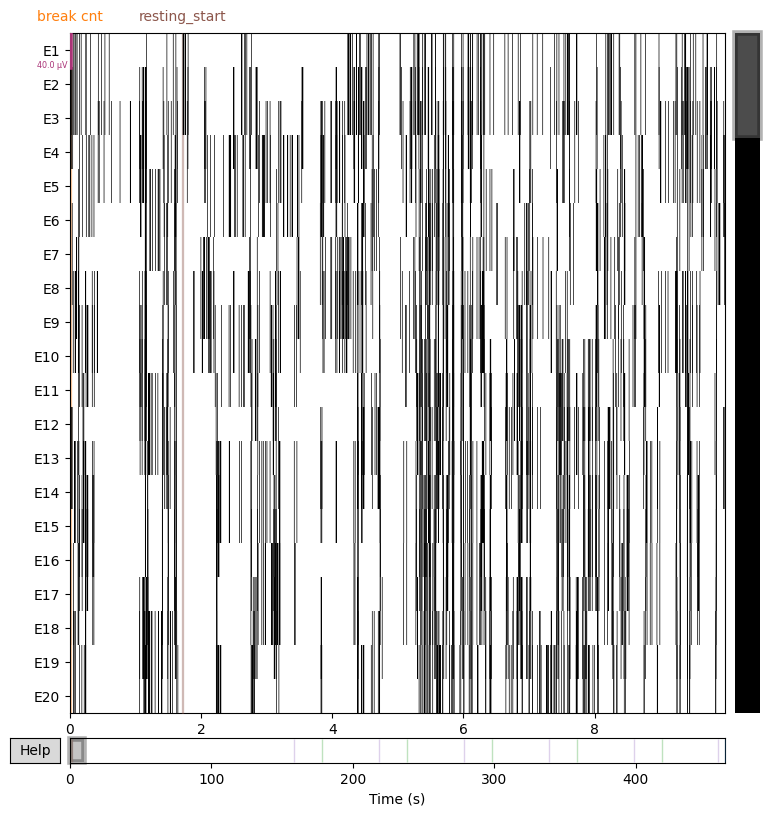

In [78]:
first_instance = preprocess_data.datasets[11].raw
first_instance.plot()

plt.show()

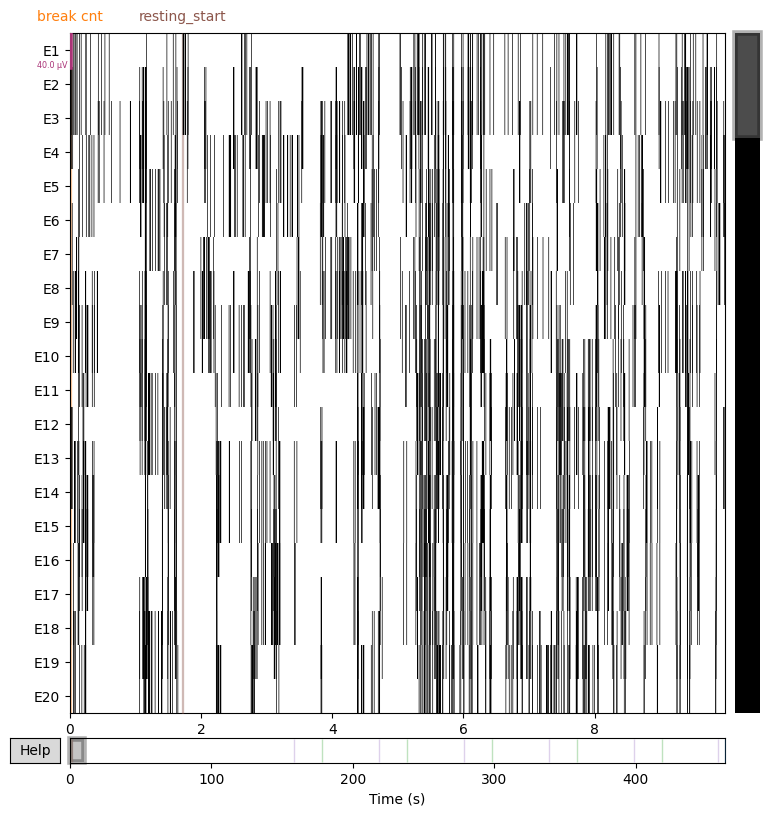

In [79]:
first_instance = dataset.datasets[11].raw
first_instance.plot()

plt.show()

In [74]:
first_instance = dataset.datasets[11].raw
first_instance 

<RawEDF | sub-NDARCZ947WU5_task-RestingState_eeg.bdf, 129 x 46300 (463.0 s), ~45.7 MiB, data loaded>

In [ ]:
SAVE_DIR = CACHE_DIR / "preprocessed"
SAVE_DIR.mkdir(parents=True, exist_ok=True)

for task, dataset in data_total.items():
    print(f"Processing task: {task}")
    task_save_dir = SAVE_DIR / task
    task_save_dir.mkdir(parents=True, exist_ok=True)

    # 1. Load data into RAM
    dataset = _force_preload(dataset)
    
    # 2. Run the pipeline (parallel, saves to disk)
    preprocess(
        concat_ds=dataset,
        preprocessors=preprocessors,
        save_dir=task_save_dir,
        overwrite=True,
        n_jobs=-1,                 # use all cores
    )

Processing task: RestingState


TypeError: Return value must be an ndarray

In [46]:
rest_state = data_total["RestingState"]
preprocess(rest_state, preprocessors, n_jobs= -1)
rest_state_raw = rest_state.datasets[3].raw
rest_state_raw.plot()

plt.show()

TypeError: pick() got an unexpected keyword argument 'pick'

In [49]:
all_recordings = []
for task, ds in data_total.items():
    for i, rec in enumerate(ds.datasets):
        rec.description['task'] = task
        all_recordings.append(rec)
    
# Single dataset
full_dataset = BaseConcatDataset(all_recordings)
print(f"Total chunks: {len(full_dataset)}")

Total chunks: 7329000


Visualizing the task

In [47]:
rest_state_raw

<RawEDF | sub-NDARBD879MBX_task-RestingState_eeg.bdf, 129 x 42900 (429.0 s), ~101 KiB, data not loaded>

## Creating the windows of interest

In [ ]:
from braindecode.datasets import BaseConcatDataset
from braindecode.preprocessing import create_windows_from_events, \
    Preprocessor, create_windows_from_events
from eegdash.hbn.windows import (
    annotate_trials_with_target,
    add_aux_anchors,
    add_extras_columns,
    keep_only_recordings_with,
)

EPOCH_LEN_S = 2.0
SFREQ = 100  # by definition here  (100Hz after resampling)

transformation_offline = [
    Preprocessor(
        annotate_trials_with_target,
        target_field = "rt_from_stimuus",
        epoch_length = EPOCH_LEN_S,
        require_stimulus=True, require_response=True,
        apply_on_array=False,
    )
]
